# Titanic - binary classification

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

### Data Preprocessing

In [5]:
#removing the columns
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#checking data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
#checking for unique value count
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [10]:
#checking for missing value count
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Refining the data

In [11]:
# replacing the missing values
df['Age'] =  df['Age'].replace(np.nan,df['Age'].median(axis=0))
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

In [12]:
#type casting Age to integer
df['Age'] = df['Age'].astype(int)

In [13]:
#replacing with 1 and female with 0
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [14]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

## Exploratory Data Analysis

#### Plotting the Countplot to visualize the numbers

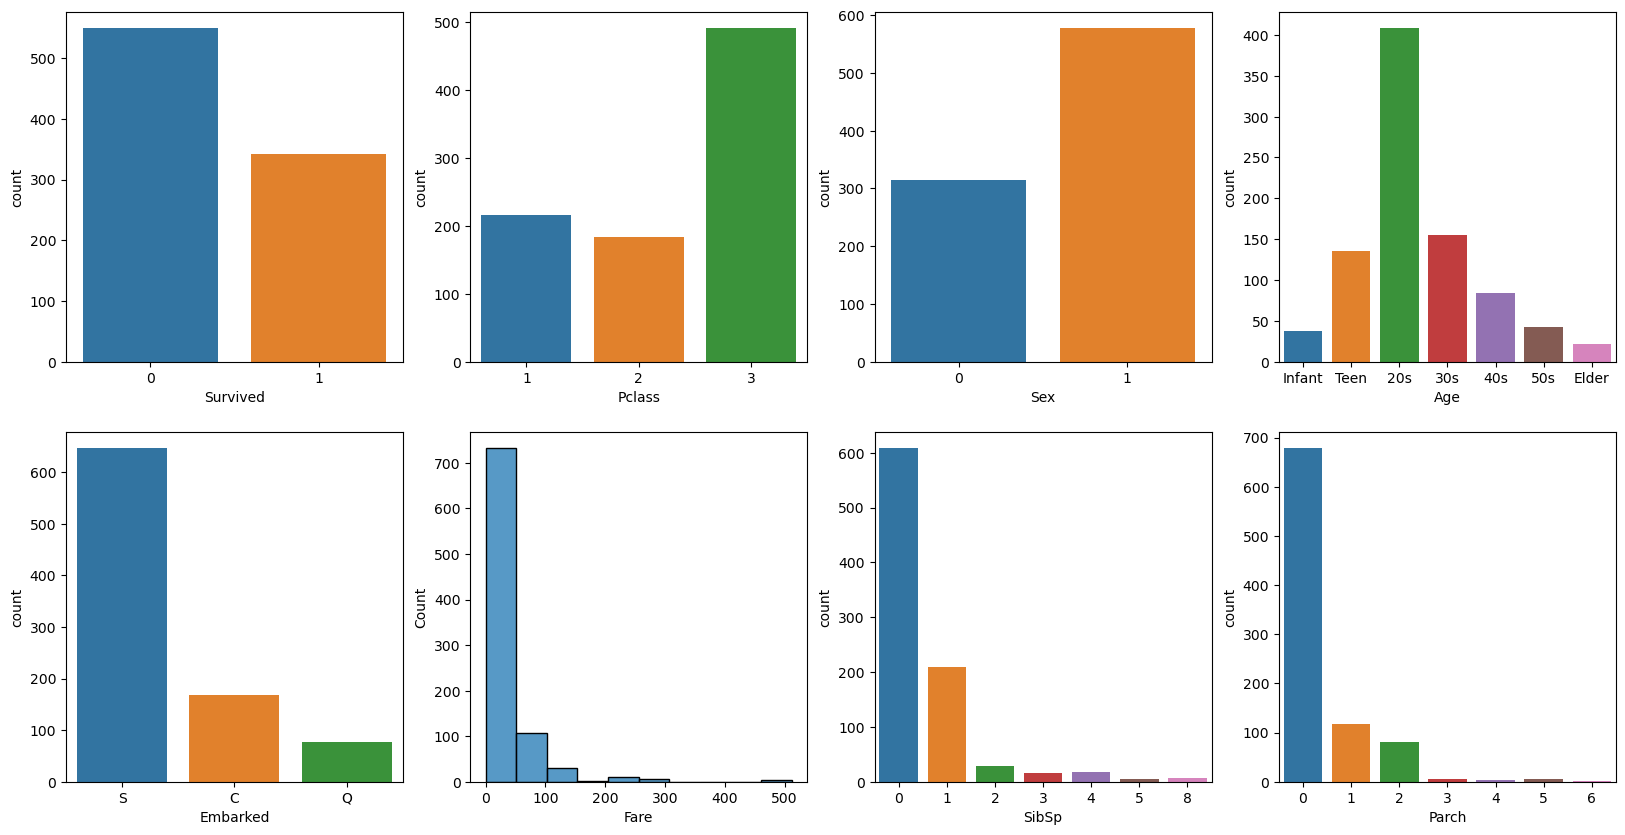

In [17]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Define the features to visualize
features = ['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Fare', 'SibSp', 'Parch']

# Plot using a loop
for i, feature in enumerate(features):
    if feature == 'Fare':
        sns.histplot(x=feature, data=df, bins=10, ax=ax[i // 4, i % 4])
    else:
        sns.countplot(x=feature, data=df, ax=ax[i // 4, i % 4])

plt.show()

#### Visualizing the replationship between the features

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

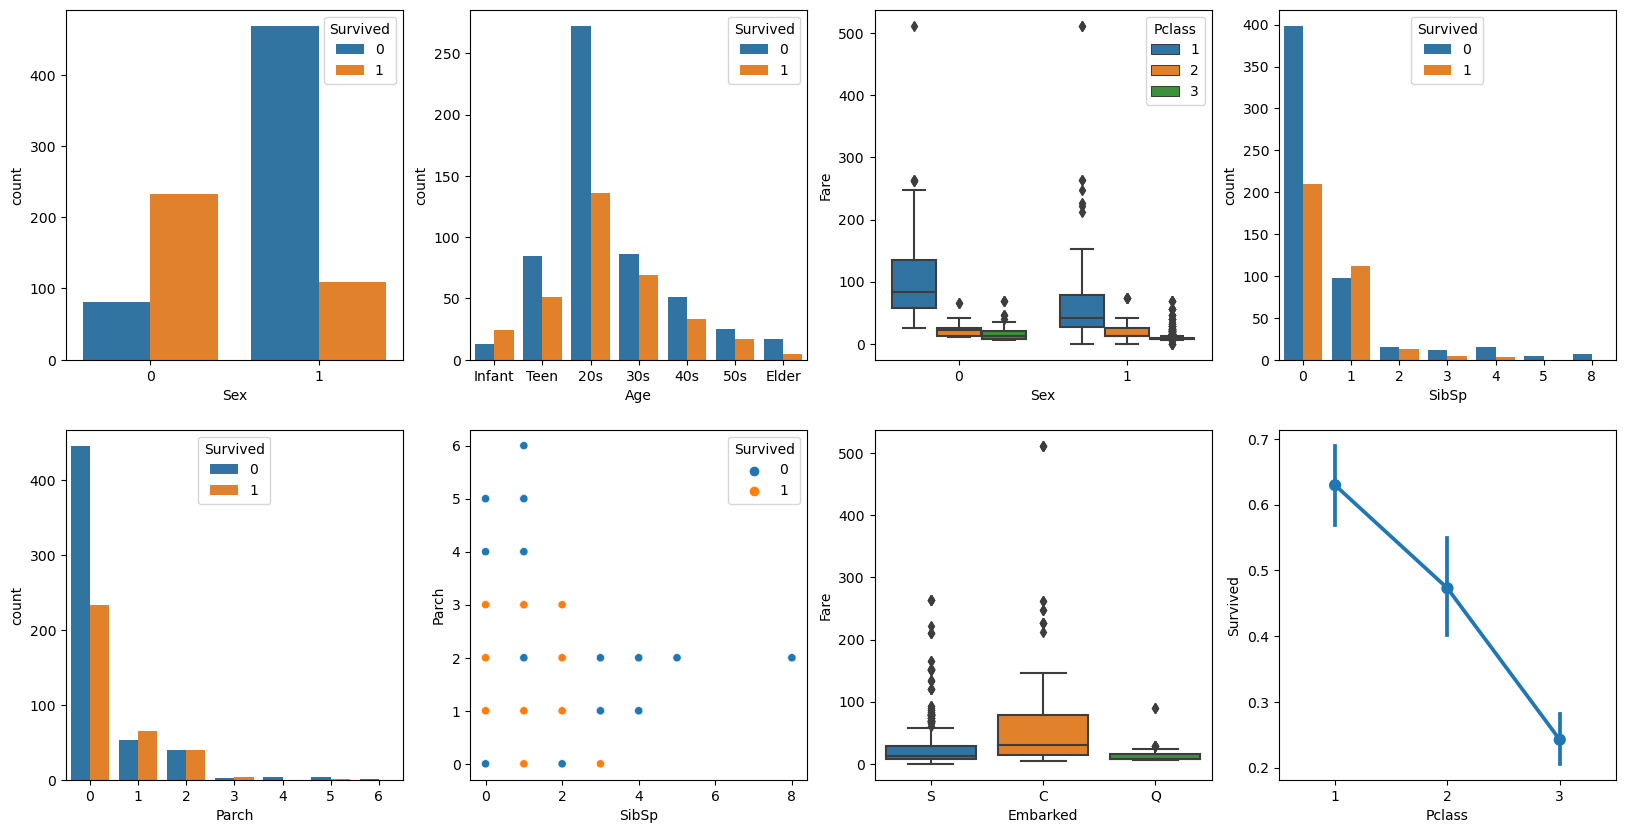

In [22]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

### Data Preprocessing

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [24]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

#### Coorelation Heatmap

<AxesSubplot:>

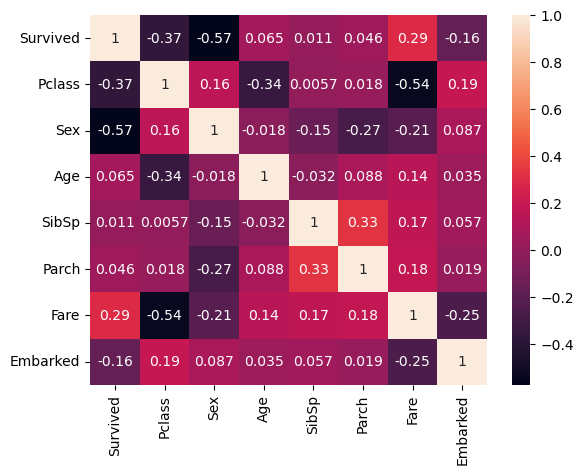

In [25]:
sns.heatmap(df.corr(), annot= True)

#### Separating the target and independent variable

In [37]:
y_train = df['Survived']
x_train = df.drop(columns=['Survived'])

### Importing test set 

In [45]:
df2 = pd.read_csv('test.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Data processing test set

In [47]:
#removing the columns
df2 = df2.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

df2['Age'] =  df2['Age'].replace(np.nan,df2['Age'].median(axis=0))
df2['Embarked'] = df2['Embarked'].replace(np.nan, 'S')

#type casting Age to integer
df2['Age'] = df2['Age'].astype(int)

#replacing with 1 and female with 0
df2['Sex'] = df2['Sex'].apply(lambda x : 1 if x == 'male' else 0)

df2['Age'] = pd.cut(x=df2['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = [0,1,2,3,4,5,6])

le.fit(['S','C','Q'])
df2['Embarked'] = le.transform(df2['Embarked'])

df2.dropna(subset=['Age'], axis= 0, inplace = True)

In [48]:
x_test = df2.drop(columns=['Survived'])
y_test = df2['Survived']

## Model Training

In [50]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

c:\Users\Ivan Reganha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Age: category

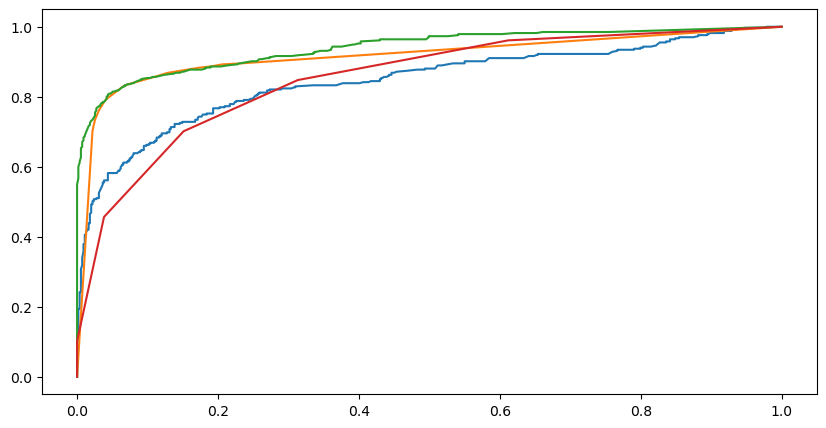

In [67]:
# Initialisation des modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    #'SVC': SVC(),
    'XGB': XGBClassifier()
}

# Entraînement des modèles et construction des courbes ROC
plt.figure(figsize=(10, 5))

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calcul du score AUC
    auc_score = roc_auc_score(y_test, y_prob)

    # Tracé de la courbe ROC
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Tracé de la ligne en diagonale (référence)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Ajout de labels et de la légende
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC pour différents modèles')
plt.legend()

# Affichage du graphe
plt.show()

#### Confusion Matrix

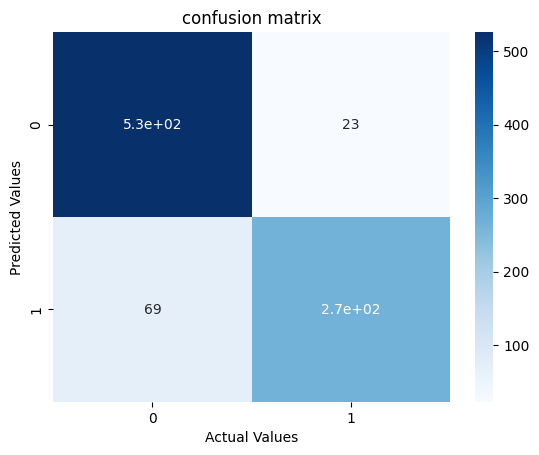

In [269]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()